In [12]:
import pandas as pd
df=pd.read_csv(r"C:\Users\murug\Downloads\SupplyChainEmissionFactorsforUSIndustriesCommodities(2016_Summary_Commodity).csv")
df.head()

,Commodity Code,Commodity Name,Substance,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,Unnamed: 7,DQ ReliabilityScore of Factors without Margins,DQ TemporalCorrelation of Factors without Margins,DQ GeographicalCorrelation of Factors without Margins,DQ TechnologicalCorrelation of Factors without Margins,DQ DataCollection of Factors without Margins
0,111CA,Farms,carbon dioxide,"kg/2018 USD, purchaser price",0.467,0.046,0.513,NaN,4,2,1,4,1
1,111CA,Farms,methane,"kg/2018 USD, purchaser price",0.025,0.000,0.026,NaN,3,2,1,1,1
2,111CA,Farms,nitrous oxide,"kg/2018 USD, purchaser price",0.002,0.000,0.002,NaN,4,2,1,4,1
3,111CA,Farms,other GHGs,"kg CO2e/2018 USD, purchaser price",0.004,0.000,0.004,NaN,4,2,1,4,1
4,113FF,"Forestry, fishing, and related activities",carbon dioxide,"kg/2018 USD, purchaser price",0.199,0.024,0.223,NaN,4,2,1,4,1


In [15]:

df = df.loc[:, ~df.columns.str.contains('^Unnamed')]


In [16]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]  # Drop any 'Unnamed' columns
df.drop_duplicates(inplace=True)                       
df.dropna(how='all', inplace=True)  

In [26]:
essential_cols = [
    'Commodity Code',
    'Commodity Name',
    'Substance',
    'Unit',
    'Supply Chain Emission Factors without Margins'
]
df.dropna(subset=essential_cols, inplace=True)


In [18]:
df.reset_index(drop=True, inplace=True)

In [27]:
print(df.head())

  Commodity Code                             Commodity Name       Substance  \
0          111CA                                      Farms  carbon dioxide   
1          111CA                                      Farms         methane   
2          111CA                                      Farms   nitrous oxide   
3          111CA                                      Farms      other GHGs   
4          113FF  Forestry, fishing, and related activities  carbon dioxide   

                                Unit  \
0       kg/2018 USD, purchaser price   
1       kg/2018 USD, purchaser price   
2       kg/2018 USD, purchaser price   
3  kg CO2e/2018 USD, purchaser price   
4       kg/2018 USD, purchaser price   

   Supply Chain Emission Factors without Margins  \
0                                          0.467   
1                                          0.025   
2                                          0.002   
3                                          0.004   
4                       

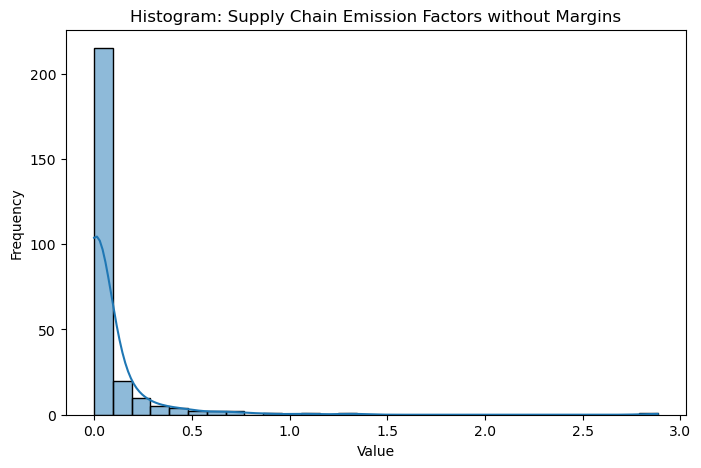

In [40]:

#Histogram

plt.figure(figsize=(8,5))
sns.histplot(df_sorted['Supply Chain Emission Factors without Margins'], bins=30, kde=True)
plt.title('Histogram: Supply Chain Emission Factors without Margins')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()


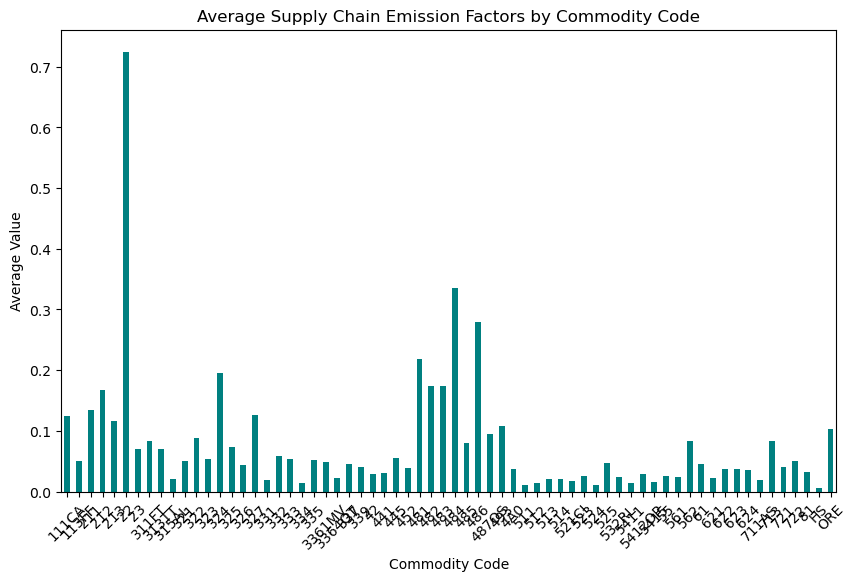

In [32]:
#Barchart
avg_by_commodity = df_sorted.groupby('Commodity Code')['Supply Chain Emission Factors without Margins'].mean()

plt.figure(figsize=(10,6))
avg_by_commodity.plot(kind='bar', color='teal')
plt.title('Average Supply Chain Emission Factors by Commodity Code')
plt.ylabel('Average Value')
plt.xlabel('Commodity Code')
plt.xticks(rotation=45)
plt.show()


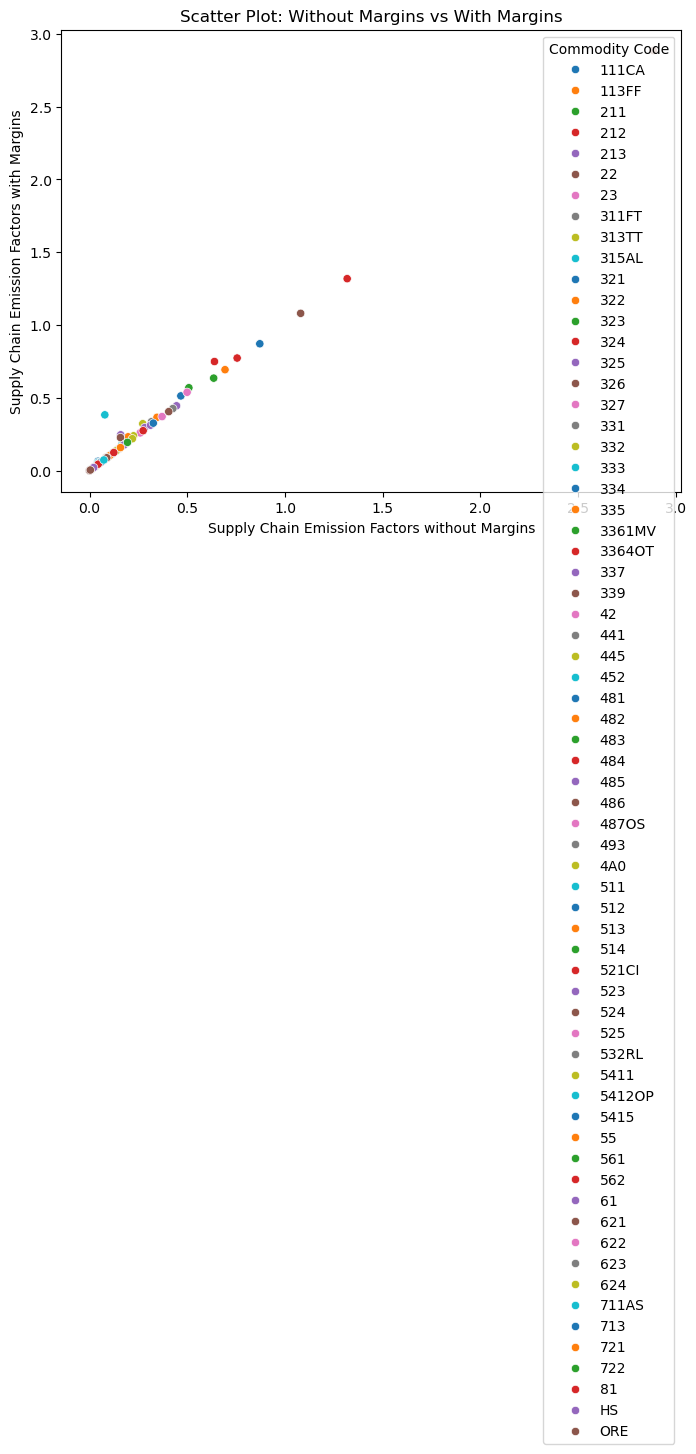

In [34]:
#ScatterPlot
plt.figure(figsize=(8,6))
sns.scatterplot(
    x='Supply Chain Emission Factors without Margins',
    y='Supply Chain Emission Factors with Margins',
    hue='Commodity Code',
    data=df_sorted,
    palette='tab10'
)
plt.title('Scatter Plot: Without Margins vs With Margins')
plt.show()


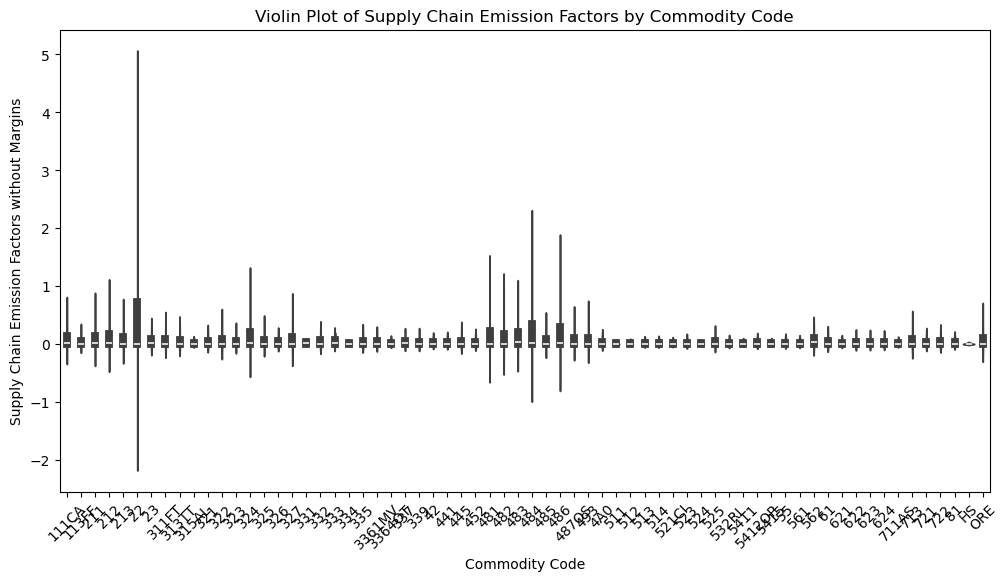

In [35]:
#ViolinPlot
plt.figure(figsize=(12,6))
sns.violinplot(x='Commodity Code', y='Supply Chain Emission Factors without Margins', data=df_sorted)
plt.title('Violin Plot of Supply Chain Emission Factors by Commodity Code')
plt.xticks(rotation=45)
plt.show()


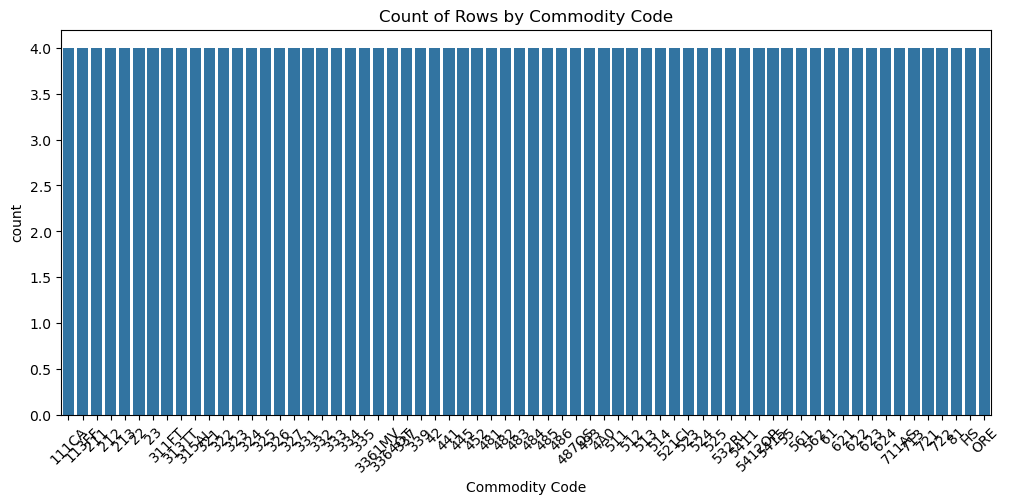

In [38]:
#CountChart
plt.figure(figsize=(12,5))
sns.countplot(data=df_sorted, x='Commodity Code', order=df_sorted['Commodity Code'].value_counts().index)
plt.title('Count of Rows by Commodity Code')
plt.xticks(rotation=45)
plt.show()


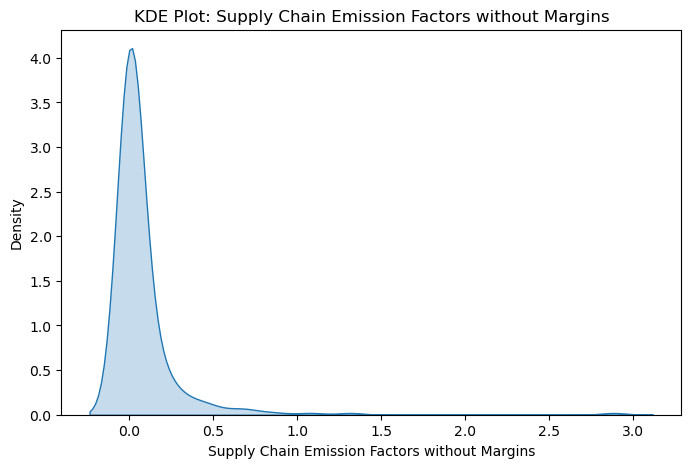

In [39]:
#KdePLot
plt.figure(figsize=(8,5))
sns.kdeplot(df_sorted['Supply Chain Emission Factors without Margins'], fill=True)
plt.title('KDE Plot: Supply Chain Emission Factors without Margins')
plt.show()
